In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from muon.deep_clustering.clustering import Config, Cluster
from muon.utils.subjects import Subjects
from muon.deep_clustering.mapping import Mapping

import os
import pickle
import math
import logging
import numpy as np
import pandas as pd
import csv
logger = logging.getLogger(__name__)

config = 'mnt/dec/dec_no_labels/config_jupyter.json'
config = Config.load(config)
print(config.__dict__)
subjects = pickle.load(open(config.subjects, 'rb'))
# cluster = Cluster.create(subjects, config)

import muon.project.parse_export as pe
agg = pe.Aggregate.load('mh2_gold')

_s = list(agg.data['subjects'].keys())
subjects2 = subjects.subset(_s)
agg.apply_labels(subjects2)

def load_set(fname):
    with open(fname, 'r') as file:
        reader = csv.DictReader(file)
        return [int(item['subject']) for item in reader]
train = load_set('mnt/training_set/train.csv')
validate = load_set('mnt/training_set/test.csv')


Using TensorFlow backend.


{'save_dir': 'mnt/dec/dec_no_labels', 'rotation': False, 'tol': 0.001, 'maxiter': 20000.0, 'ae_weights': 'mnt/dec/dec_no_labels/ae_weights.h5', 'nodes': [500, 500, 2000, 10], 'update_interval': 140, 'batch_size': 256, 'n_clusters': 50, 'subjects': 'mnt/dec/dec_no_labels/subjects.pkl', 'momentum': 0.9, 'lr': 0.01}


Initializing model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 499)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               250000    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 50)                500       
Total params: 1,523,010
Trainable params: 1,523,010
Non-trainable params: 0
_______________________________________________

/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[ 0.  0.  0. ...,  0.  1.  1.] None
[ 0.  1.  0. ...,  0.  1.  1.] None


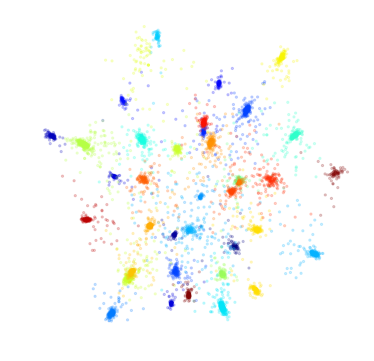

In [2]:
cluster = Cluster.create(subjects2, config)
print('Initializing model')
cluster.initialize()

kwargs = {'mode': 'all', 'shuffle': True}
mapping = Mapping(cluster, agg, train, validate, **kwargs)
mapping.pca_plot()
plt.show()

Initializing model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 499)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               250000    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 50)                500       
Total params: 1,523,010
Trainable params: 1,523,010
Non-trainable params: 0
_______________________________________________

/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[ 0.  0.  0. ...,  0.  1.  1.] None
[ 0.  1.  0. ...,  0.  1.  1.] None
7423
batching
7423 1000
batch 2
Train on 1000 samples, validate on 2474 samples
Epoch 1/40
1000/1000 [==============================] - 1s 829us/step - loss: 0.6305 - val_loss: 0.6023
Epoch 2/40
1000/1000 [==============================] - 0s 458us/step - loss: 0.6186 - val_loss: 0.6032
Epoch 3/40
1000/1000 [==============================] - 0s 485us/step - loss: 0.6100 - val_loss: 0.6098
Epoch 4/40
1000/1000 [==============================] - 0s 482us/step - loss: 0.6011 - val_loss: 0.6102
Epoch 5/40
1000/1000 [==============================] - 0s 490us/step - loss: 0.5925 - val_loss: 0.6128
Epoch 6/40
1000/1000 [==============================] - 0s 483us/step - loss: 0.5824 - val_loss: 0.6153
Epoch 7/40
1000/1000 [==============================] - 0s 486us/step - loss: 0.5711 - val_loss: 0.6134
Epoch 8/40
1000/1000 [==============================] - 0s 491us/step - loss: 0.5650 - val_loss: 0.6170
Epoch 9/40
1000/

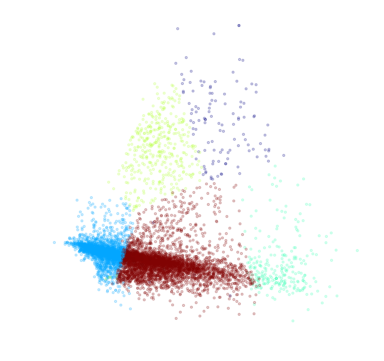

In [7]:
cluster = Cluster.create(subjects2, config)
print('Initializing model')
cluster.initialize()

kwargs = {'mode': 'all', 'batched':True, 'shuffle': True}
mapping = Mapping(cluster, agg, train, validate, **kwargs)
mapping.apply_mapping(epochs=40)

print(mapping.FOM)
pred=mapping.cluster.predict()
cm = pred.cluster_mapping
print(cm[cm['majority_class_fraction']>= 0])

mapping.pca_plot()
plt.show()

Initializing model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 499)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               250000    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 50)                500       
Total params: 1,523,010
Trainable params: 1,523,010
Non-trainable params: 0
_______________________________________________

/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[ 0.  0.  0. ...,  0.  1.  1.] None
[ 0.  1.  0. ...,  0.  1.  1.] None
7423
batching
7423 1000
batch 2
Train on 1000 samples, validate on 2474 samples
Epoch 1/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6366 - val_loss: 0.5948
Epoch 2/100
1000/1000 [==============================] - 1s 506us/step - loss: 0.6252 - val_loss: 0.6051
Epoch 3/100
1000/1000 [==============================] - 1s 506us/step - loss: 0.6161 - val_loss: 0.6073
Epoch 4/100
1000/1000 [==============================] - 0s 485us/step - loss: 0.6053 - val_loss: 0.6060
Epoch 5/100
1000/1000 [==============================] - 0s 485us/step - loss: 0.5954 - val_loss: 0.6106
Epoch 6/100
1000/1000 [==============================] - 0s 486us/step - loss: 0.5859 - val_loss: 0.6128
Epoch 7/100
1000/1000 [==============================] - 0s 485us/step - loss: 0.5749 - val_loss: 0.6110
Epoch 8/100
1000/1000 [==============================] - 0s 487us/step - loss: 0.5588 - val_loss: 0.6144
Epoch 9/10

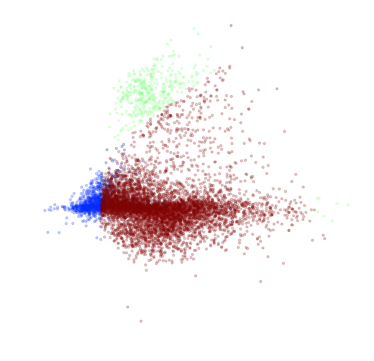

In [11]:
cluster = Cluster.create(subjects2, config)
print('Initializing model')
cluster.initialize()

kwargs = {'mode': 'all', 'batched':True, 'shuffle': True}
mapping = Mapping(cluster, agg, train, validate, **kwargs)
mapping.apply_mapping(epochs=100)

print(mapping.FOM)
pred=mapping.cluster.predict()
cm = pred.cluster_mapping
print(cm[cm['majority_class_fraction']>= 0])

mapping.pca_plot()
plt.show()

Initializing model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 499)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               250000    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 50)                500       
Total params: 1,523,010
Trainable params: 1,523,010
Non-trainable params: 0
_______________________________________________

/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[ 0.  0.  0. ...,  0.  1.  1.] None
[ 0.  1.  0. ...,  0.  1.  1.] None
7423
batching
7423 100
batch 2
Train on 100 samples, validate on 2474 samples
Epoch 1/40
100/100 [==============================] - 1s 12ms/step - loss: 0.6152 - val_loss: 0.5625
Epoch 2/40
100/100 [==============================] - 0s 3ms/step - loss: 0.6023 - val_loss: 0.5930
Epoch 3/40
100/100 [==============================] - 0s 3ms/step - loss: 0.5954 - val_loss: 0.5934
Epoch 4/40
100/100 [==============================] - 0s 3ms/step - loss: 0.5896 - val_loss: 0.5965
Epoch 5/40
100/100 [==============================] - 0s 3ms/step - loss: 0.5821 - val_loss: 0.6030
Epoch 6/40
100/100 [==============================] - 0s 3ms/step - loss: 0.5753 - val_loss: 0.6095
Epoch 7/40
100/100 [==============================] - 0s 3ms/step - loss: 0.5658 - val_loss: 0.6106
Epoch 8/40
100/100 [==============================] - 0s 3ms/step - loss: 0.5631 - val_loss: 0.6118
Epoch 9/40
100/100 [=============================

/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


100/100 [==============================] - 0s 3ms/step - loss: 0.5866 - val_loss: 0.6293
Epoch 2/40
100/100 [==============================] - 0s 3ms/step - loss: 0.5757 - val_loss: 0.6289
Epoch 3/40
100/100 [==============================] - 0s 3ms/step - loss: 0.5587 - val_loss: 0.6284
Epoch 4/40
100/100 [==============================] - 0s 3ms/step - loss: 0.5476 - val_loss: 0.6279
Epoch 5/40
100/100 [==============================] - 0s 3ms/step - loss: 0.5313 - val_loss: 0.6274
Epoch 6/40
100/100 [==============================] - 0s 3ms/step - loss: 0.5179 - val_loss: 0.6270
Epoch 7/40
100/100 [==============================] - 0s 3ms/step - loss: 0.5023 - val_loss: 0.6268
Epoch 8/40
100/100 [==============================] - 0s 3ms/step - loss: 0.4948 - val_loss: 0.6265
Epoch 9/40
100/100 [==============================] - 0s 3ms/step - loss: 0.4859 - val_loss: 0.6262
Epoch 10/40
100/100 [==============================] - 0s 3ms/step - loss: 0.4796 - val_loss: 0.6259
Epoch 11/4

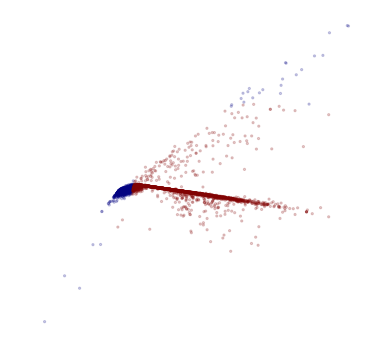

In [14]:
cluster = Cluster.create(subjects2, config)
print('Initializing model')
cluster.initialize()

kwargs = {'mode': 'all', 'size':100, 'batched':True, 'shuffle': True}
mapping = Mapping(cluster, agg, train, validate, **kwargs)
mapping.apply_mapping(epochs=40)

print(mapping.FOM)
pred=mapping.cluster.predict()
cm = pred.cluster_mapping
print(cm[cm['majority_class_fraction']>= 0])

mapping.pca_plot()
plt.show()

7423
not batching
batch 2
Train on 7423 samples, validate on 2474 samples
Epoch 1/5
7423/7423 [==============================] - 4s 487us/step - loss: 0.4499 - val_loss: 0.6311
Epoch 2/5
7423/7423 [==============================] - 2s 325us/step - loss: 0.4296 - val_loss: 0.6292
Epoch 3/5
7423/7423 [==============================] - 2s 330us/step - loss: 0.4159 - val_loss: 0.6269
Epoch 4/5
7423/7423 [==============================] - 2s 334us/step - loss: 0.4060 - val_loss: 0.6247
Epoch 5/5
7423/7423 [==============================] - 2s 330us/step - loss: 0.3994 - val_loss: 0.6262


/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[ 0.  0.  0. ...,  0.  1.  1.] None
current validation:  0.536507936508
[0.5365079365079366]
[ 0.  0.  0. ...,  0.  1.  1.] None
[ 0.  1.  0. ...,  0.  1.  1.] None
[0.81258023106546851, 0.80080935251798557, 0.74300932090545935, 0.7657374100719424, 0.015384615384615385, 0.0092628328830567357, 0.55839133797370466, 0.55168661588683354, 0.5365079365079366, 0.52086250350042007]
    n_assigned  majority_class  majority_class_fraction
5            1               0                 1.000000
14        1357               1                 0.934414
49        8539               0                 0.741656


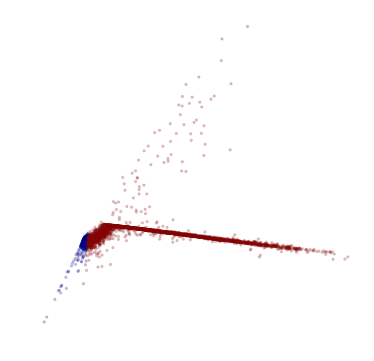

In [19]:
mapping.cluster.dec.model.load_weights('gold_100b_40e.h5')
mapping.mode['mode']='all'
mapping.mode['batched']=False
mapping.apply_mapping(epochs=5)
print(mapping.FOM)
pred=mapping.cluster.predict()
cm = pred.cluster_mapping
print(cm[cm['majority_class_fraction']>= 0])

mapping.pca_plot()
plt.show()

/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[ 0.  0.  0. ...,  0.  1.  1.] None
[ 0.  1.  0. ...,  0.  1.  1.] None
7423
not batching
batch 2
Train on 7423 samples, validate on 2474 samples
Epoch 1/2
7423/7423 [==============================] - 4s 567us/step - loss: 0.4491 - val_loss: 0.6295
Epoch 2/2
7423/7423 [==============================] - 2s 315us/step - loss: 0.4273 - val_loss: 0.6255
[ 0.  0.  0. ...,  0.  1.  1.] None
current validation:  0.77763496144
[0.77763496143958877]
[ 0.  0.  0. ...,  0.  1.  1.] None
[ 0.  1.  0. ...,  0.  1.  1.] None
[0.69699090272918141, 0.6872700515084621, 0.77763496143958877, 0.77265572295929841]
    n_assigned  majority_class  majority_class_fraction
14        2529               1                 0.918545
49        7368               0                 0.843784


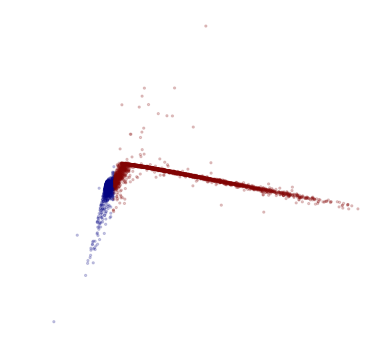

In [28]:
kwargs = {'mode': 'all', 'size':1000, 'batched':False, 'shuffle': True}
mapping = Mapping(cluster, agg, train, validate, **kwargs)
mapping.cluster.dec.model.load_weights('gold_100b_40e.h5')
mapping.apply_mapping(epochs=2)
print(mapping.FOM)
pred=mapping.cluster.predict()
cm = pred.cluster_mapping
print(cm[cm['majority_class_fraction']>= 0])

mapping.pca_plot()
plt.show()

Initializing model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 499)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               250000    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 50)                500       
Total params: 1,523,010
Trainable params: 1,523,010
Non-trainable params: 0
_______________________________________________

/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[ 0.  0.  0. ...,  0.  1.  1.] None
[ 0.  1.  0. ...,  0.  1.  1.] None
7423
not batching
batch 2
Train on 7423 samples, validate on 2474 samples
Epoch 1/100
7423/7423 [==============================] - 3s 427us/step - loss: 0.6143 - val_loss: 0.6045
Epoch 2/100
7423/7423 [==============================] - 2s 322us/step - loss: 0.5511 - val_loss: 0.6058
Epoch 3/100
7423/7423 [==============================] - 2s 320us/step - loss: 0.5057 - val_loss: 0.6072
Epoch 4/100
7423/7423 [==============================] - 2s 325us/step - loss: 0.4837 - val_loss: 0.6075
Epoch 5/100
7423/7423 [==============================] - 2s 322us/step - loss: 0.4700 - val_loss: 0.6091
Epoch 6/100
7423/7423 [==============================] - 2s 327us/step - loss: 0.4590 - val_loss: 0.6086
Epoch 7/100
7423/7423 [==============================] - 2s 324us/step - loss: 0.4506 - val_loss: 0.6089
Epoch 8/100
7423/7423 [==============================] - 2s 325us/step - loss: 0.4441 - val_loss: 0.6132
Epoch 9/100
74

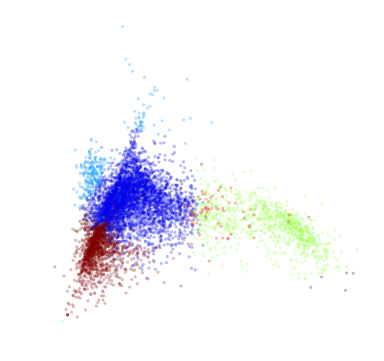

In [13]:
cluster = Cluster.create(subjects2, config)
print('Initializing model')
cluster.initialize()

kwargs = {'mode': 'all', 'batched':False, 'shuffle': True}
mapping = Mapping(cluster, agg, train, validate, **kwargs)
mapping.apply_mapping(epochs=100)

print(mapping.FOM)
pred=mapping.cluster.predict()
cm = pred.cluster_mapping
print(cm[cm['majority_class_fraction']>= 0])

mapping.pca_plot()
plt.show()

Initializing model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 499)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               250000    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 50)                500       
Total params: 1,523,010
Trainable params: 1,523,010
Non-trainable params: 0
_______________________________________________

/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[ 0.  0.  0. ...,  0.  1.  1.] None
[ 0.  1.  0. ...,  0.  1.  1.] None
7423
not batching
batch 2
Train on 7423 samples, validate on 2474 samples
Epoch 1/500
7423/7423 [==============================] - 4s 500us/step - loss: 0.6136 - val_loss: 0.6073
Epoch 2/500
7423/7423 [==============================] - 2s 327us/step - loss: 0.5490 - val_loss: 0.6065
Epoch 3/500
7423/7423 [==============================] - 2s 327us/step - loss: 0.5039 - val_loss: 0.6026
Epoch 4/500
7423/7423 [==============================] - 2s 333us/step - loss: 0.4849 - val_loss: 0.6048
Epoch 5/500
7423/7423 [==============================] - 2s 334us/step - loss: 0.4692 - val_loss: 0.6089
Epoch 6/500
7423/7423 [==============================] - 2s 327us/step - loss: 0.4596 - val_loss: 0.6070
Epoch 7/500
7423/7423 [==============================] - 2s 322us/step - loss: 0.4508 - val_loss: 0.6088
Epoch 8/500
7423/7423 [==============================] - 2s 321us/step - loss: 0.4445 - val_loss: 0.6094
Epoch 9/500
74

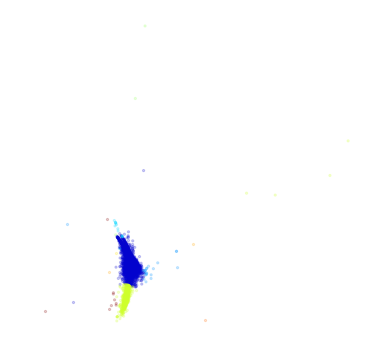

In [20]:
cluster = Cluster.create(subjects2, config)
print('Initializing model')
cluster.initialize()

kwargs = {'mode': 'all', 'batched':False, 'shuffle': True}
mapping = Mapping(cluster, agg, train, validate, **kwargs)
mapping.apply_mapping(epochs=500)

print(mapping.FOM)
pred=mapping.cluster.predict()
cm = pred.cluster_mapping
print(cm[cm['majority_class_fraction']>= 0])

mapping.pca_plot()
plt.show()

Initializing model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 499)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               250000    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 50)                500       
Total params: 1,523,010
Trainable params: 1,523,010
Non-trainable params: 0
_______________________________________________

/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[ 0.  0.  0. ...,  0.  1.  1.] None
[ 0.  1.  0. ...,  0.  1.  1.] None
7423
batching
7423 1000
batch 2
Train on 1000 samples, validate on 2474 samples
Epoch 1/60
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6213 - val_loss: 0.5995
Epoch 2/60
1000/1000 [==============================] - 1s 529us/step - loss: 0.6108 - val_loss: 0.6023
Epoch 3/60
1000/1000 [==============================] - 1s 537us/step - loss: 0.6029 - val_loss: 0.6037
Epoch 4/60
1000/1000 [==============================] - 1s 535us/step - loss: 0.5932 - val_loss: 0.6043
Epoch 5/60
1000/1000 [==============================] - 1s 514us/step - loss: 0.5826 - val_loss: 0.6089
Epoch 6/60
1000/1000 [==============================] - 1s 514us/step - loss: 0.5715 - val_loss: 0.6079
Epoch 7/60
1000/1000 [==============================] - 1s 500us/step - loss: 0.5639 - val_loss: 0.6088
Epoch 8/60
1000/1000 [==============================] - 0s 495us/step - loss: 0.5521 - val_loss: 0.6129
Epoch 9/60
1000/10

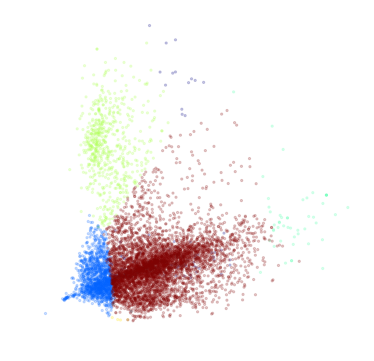

In [12]:
cluster = Cluster.create(subjects2, config)
print('Initializing model')
cluster.initialize()

kwargs = {'mode': 'all', 'batched':True, 'shuffle': True}
mapping = Mapping(cluster, agg, train, validate, **kwargs)
mapping.apply_mapping(epochs=60)

print(mapping.FOM)
pred=mapping.cluster.predict()
cm = pred.cluster_mapping
print(cm[cm['majority_class_fraction']>= 0])

mapping.pca_plot()
plt.show()

Initializing model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 499)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               250000    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 50)                500       
Total params: 1,523,010
Trainable params: 1,523,010
Non-trainable params: 0
_______________________________________________

/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[ 0.  0.  0. ...,  0.  1.  1.] None
[ 0.  1.  0. ...,  0.  1.  1.] None
7423
not batching
batch 2
Train on 7423 samples, validate on 2474 samples
Epoch 1/50
7423/7423 [==============================] - 3s 365us/step - loss: 0.6142 - val_loss: 0.6070
Epoch 2/50
7423/7423 [==============================] - 2s 303us/step - loss: 0.5501 - val_loss: 0.6076
Epoch 3/50
7423/7423 [==============================] - 2s 304us/step - loss: 0.5054 - val_loss: 0.6065
Epoch 4/50
7423/7423 [==============================] - 2s 306us/step - loss: 0.4848 - val_loss: 0.6068
Epoch 5/50
7423/7423 [==============================] - 2s 310us/step - loss: 0.4701 - val_loss: 0.6089
Epoch 6/50
7423/7423 [==============================] - 2s 306us/step - loss: 0.4585 - val_loss: 0.6087
Epoch 7/50
7423/7423 [==============================] - 2s 306us/step - loss: 0.4511 - val_loss: 0.6103
Epoch 8/50
7423/7423 [==============================] - 2s 309us/step - loss: 0.4453 - val_loss: 0.6123
Epoch 9/50
7423/7423 [

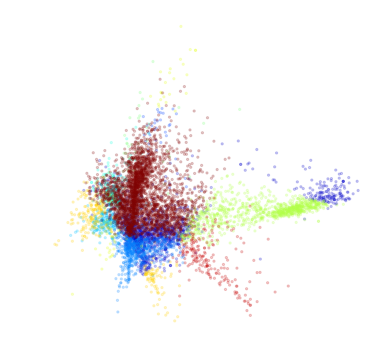

In [9]:
cluster = Cluster.create(subjects2, config)
print('Initializing model')
cluster.initialize()

kwargs = {'mode': 'all', 'batched':False, 'shuffle': True}
mapping = Mapping(cluster, agg, train, validate, **kwargs)
mapping.apply_mapping(epochs=50)

print(mapping.FOM)
pred=mapping.cluster.predict()
cm = pred.cluster_mapping
print(cm[cm['majority_class_fraction']>= 0])

mapping.pca_plot()
plt.show()